# Time-Predictor
## Personal Notes and Timeline
- IOT Project
- Complete for review 3
- Phase 2, Microcontroller phase and literature Review

# Imports

In [1]:
import turicreate as tc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import re

In [2]:
bbq_temps = tc.SFrame("../data/feed2.csv")

Finished parsing file /Users/SaharshShukla/My Documents/Core/IOT-Review-3/IOT_Temperatur_ESP8266/data/feed2.csv

Parsing completed. Parsed 100 lines in 0.02429 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Core/IOT-Review-3/IOT_Temperatur_ESP8266/data/feed2.csv

Parsing completed. Parsed 100 lines in 0.005634 secs.

# Data Visualization

In [3]:
tc.visualization.heatmap(x= bbq_temps['field1'],y= bbq_temps['field2'], 
                         xlabel='Smoker Temperature', ylabel='Internal Temperature')

In [4]:
tc.plot(x= bbq_temps['field1'], y= bbq_temps['field2'],
       xlabel='Smoker Temperature', ylabel='Internal Temperature')

Materializing X axis SArray

Materializing Y axis SArray

In [5]:
bbq_temps.show()

Materializing SFrame

In [6]:
bbq_temps.explore()

,created_at,entry_id,field1,field2
0,2017-05-29 04:59:53 UTC,16,248.7,104.8
1,2017-05-29 05:07:23 UTC,17,253.9,107.0
2,2017-05-29 05:11:53 UTC,18,253.6,117.3
3,2017-05-29 05:19:23 UTC,19,244.8,118.1
4,2017-05-29 05:25:23 UTC,20,248.8,118.4
5,2017-05-29 05:34:23 UTC,21,250.3,122.1
6,2017-05-29 05:38:53 UTC,22,249.0,141.1
7,2017-05-29 05:44:53 UTC,23,251.9,143.7
8,2017-05-29 05:49:23 UTC,24,251.5,143.8
9,2017-05-29 05:52:23 UTC,25,247.5,145.7


# Model based only on temperatures

In [7]:
train, test = bbq_temps.random_split(0.9)
linear_regression_model =  tc.linear_regression.create(dataset=train, target='field2', features=['field1'])

Linear regression:

--------------------------------------------------------

Number of examples          : 86

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.005602     | 50.311257          | 15.160897                       |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [8]:
linear_regression_model.predict(test)

dtype: float
Rows: 14
[155.35256060199552, 155.1855044407623, 155.1251786047614, 155.1251786047614, 155.19478533860857, 155.92797626846559, 155.10197636014567, 154.9627628924513, 155.0555718709142, 155.04165052414479, 155.04165052414479, 154.91635840321985, 155.42680778476586, 155.19014488968543]

In [9]:
test.explore()

,created_at,entry_id,field1,field2
0,2017-05-29 05:07:23 UTC,17,253.9,107.0
1,2017-05-29 05:34:23 UTC,21,250.3,122.1
2,2017-05-29 05:38:53 UTC,22,249.0,141.1
3,2017-05-29 07:43:23 UTC,43,249.0,149.4
4,2017-05-29 08:10:23 UTC,48,250.5,152.1
5,2017-05-29 09:31:23 UTC,59,266.3,156.7
6,2017-05-29 09:35:53 UTC,60,248.5,151.3
7,2017-05-29 10:34:23 UTC,70,245.5,151.1
8,2017-05-29 11:13:23 UTC,76,247.5,150.0
9,2017-05-29 11:29:53 UTC,78,247.2,149.7


In [10]:
test['predictions'] = linear_regression_model.predict(test)

In [11]:
test.explore()

,created_at,entry_id,field1,field2,predictions
0,2017-05-29 05:07:23 UTC,17,253.9,107.0,155.352561
1,2017-05-29 05:34:23 UTC,21,250.3,122.1,155.185504
2,2017-05-29 05:38:53 UTC,22,249.0,141.1,155.125179
3,2017-05-29 07:43:23 UTC,43,249.0,149.4,155.125179
4,2017-05-29 08:10:23 UTC,48,250.5,152.1,155.194785
5,2017-05-29 09:31:23 UTC,59,266.3,156.7,155.927976
6,2017-05-29 09:35:53 UTC,60,248.5,151.3,155.101976
7,2017-05-29 10:34:23 UTC,70,245.5,151.1,154.962763
8,2017-05-29 11:13:23 UTC,76,247.5,150.0,155.055572
9,2017-05-29 11:29:53 UTC,78,247.2,149.7,155.041651


# Factoring in the running time

In [12]:
import datetime as dt

In [13]:
bbq_temps_time = bbq_temps

In [14]:
bbq_temps_time['time'] = bbq_temps['created_at'].str_to_datetime(format='%Y-%m-%dT%H:%M:%S%ZP')

## Now The new dataset to be used is:
<Strong>bbq_temps_time</Strong>

In [15]:
st = bbq_temps_time['time'][0]

In [16]:
bbq_temps_time['difference'] =(bbq_temps_time['time']-st)

In [17]:
bbq_temps_time.explore()

,created_at,entry_id,field1,field2,time,difference
0,2017-05-29 04:59:53 UTC,16,248.7,104.8,2017-05-29 04:59:53+00:00,0.0
1,2017-05-29 05:07:23 UTC,17,253.9,107.0,2017-05-29 05:07:23+00:00,450.0
2,2017-05-29 05:11:53 UTC,18,253.6,117.3,2017-05-29 05:11:53+00:00,720.0
3,2017-05-29 05:19:23 UTC,19,244.8,118.1,2017-05-29 05:19:23+00:00,1170.0
4,2017-05-29 05:25:23 UTC,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0
5,2017-05-29 05:34:23 UTC,21,250.3,122.1,2017-05-29 05:34:23+00:00,2070.0
6,2017-05-29 05:38:53 UTC,22,249.0,141.1,2017-05-29 05:38:53+00:00,2340.0
7,2017-05-29 05:44:53 UTC,23,251.9,143.7,2017-05-29 05:44:53+00:00,2700.0
8,2017-05-29 05:49:23 UTC,24,251.5,143.8,2017-05-29 05:49:23+00:00,2970.0
9,2017-05-29 05:52:23 UTC,25,247.5,145.7,2017-05-29 05:52:23+00:00,3150.0


# Creating model

In [18]:
time_train, time_test = bbq_temps_time.random_split(0.9)
model_time=tc.linear_regression.create(dataset=time_train,
                                       target='field2', features=['difference', 'field1'])

Linear regression:

--------------------------------------------------------

Number of examples          : 93

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000765     | 28.998258          | 9.710943                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [19]:
model_time.predict(time_test)

dtype: float
Rows: 7
[135.55781835323654, 144.04325127712457, 153.0503374129695, 157.81569525191384, 159.574408997055, 160.1899747685169, 163.6143366979029]

In [20]:
time_test['prediction'] = model_time.predict(time_test)

In [21]:
time_test

created_at,entry_id,field1,field2,time,difference,prediction
2017-05-29 05:25:23 UTC,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0,135.55781835323654
2017-05-29 07:28:23 UTC,41,250.6,150.6,2017-05-29 07:28:23+00:00,8910.0,144.04325127712457
2017-05-29 09:38:53 UTC,61,249.5,150.6,2017-05-29 09:38:53+00:00,16740.0,153.0503374129695
2017-05-29 10:47:53 UTC,72,246.8,151.1,2017-05-29 10:47:53+00:00,20880.0,157.81569525191384
2017-05-29 11:13:23 UTC,76,247.5,150.0,2017-05-29 11:13:23+00:00,22410.0,159.574408997055
2017-05-29 11:22:23 UTC,77,251.4,151.9,2017-05-29 11:22:23+00:00,22950.0,160.1899747685169
2017-05-29 12:11:53 UTC,84,245.4,151.8,2017-05-29 12:11:53+00:00,25920.0,163.6143366979029


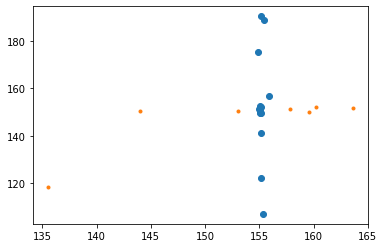

In [22]:
plt.plot(test['predictions'], test['field2'], 'o',
        time_test['prediction'], time_test['field2'], '.')

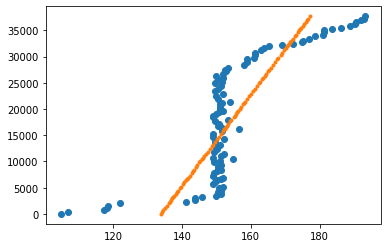

In [23]:
plt.plot(bbq_temps_time['field2'], bbq_temps_time['difference'], 'o',
        model_time.predict(bbq_temps_time), bbq_temps_time['difference'], '.')

# Model 2

In [24]:
model_time_2 = tc.regression.create(dataset=time_train,
                                       target='field2', features=['difference', 'field1'])

Automatically generating validation set from 10% of the data.

Linear regression:

--------------------------------------------------------

Number of examples          : 80

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.000688     | 28.291439          | 10.517811            | 10.215882                       | 5.796560                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 80

Number of features          : 2

Number of unpacked features : 2

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.004916     | 146.773712         | 128.673706           | 110.683731                      | 106.833839                        |

| 2         | 0.007627     | 113.582932         | 95.482925            | 78.630272                       | 73.742912                         |

| 3         | 0.010849     | 84.918297          | 66.818291            | 55.984612                       | 52.186958                         |

| 4         | 0.014214     | 63.752548          | 45.652542            | 39.921497                       | 36.632835                         |

| 5         | 0.017021     | 49.299881          | 31.199875            | 28.531284                       | 25.840170                         |

| 10        | 0.030874     | 13.736237          | 7.052048             | 5.670188                        | 4.658894                          |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

# Using Regression (Quadratic)

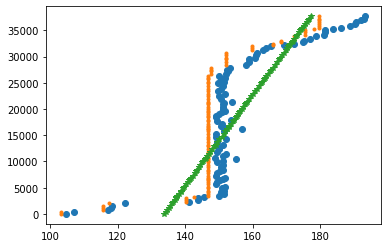

In [25]:
plt.plot(bbq_temps_time['field2'], bbq_temps_time['difference'], 'o',
        model_time_2.predict(bbq_temps_time), bbq_temps_time['difference'], '.',
        model_time.predict(bbq_temps_time), bbq_temps_time['difference'], '*')

In [26]:
model_time.evaluate(time_test)

{'max_error': 17.157818353236536, 'rmse': 9.917214049523864}

In [27]:
model_time_2.evaluate(time_test)

{'max_error': 5.12481689453125, 'rmse': 4.099887654469466}

# Model - 3

In [28]:
train_data, test_data = bbq_temps_time.random_split(0.9)
model_time_3 = tc.regression.create(bbq_temps_time, target='difference', features=['field1','field2'])

Automatically generating validation set from 10% of the data.

Linear regression:

--------------------------------------------------------

Number of examples          : 89

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.000612     | 12842.665109       | 10340.845341         | 6689.825663                     | 7174.181811                       |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 89

Number of features          : 2

Number of unpacked features : 2

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.006094     | 28062.335938       | 22960.896484         | 16227.259766                    | 14521.077148                      |

| 2         | 0.010987     | 21198.007812       | 22054.761719         | 12141.992188                    | 11866.161133                      |

| 3         | 0.015562     | 16482.804688       | 17339.558594         | 9331.768555                     | 9388.381836                       |

| 4         | 0.020224     | 14647.034180       | 15796.990234         | 7367.313965                     | 8384.308594                       |

| 5         | 0.025020     | 13806.059570       | 14956.015625         | 5943.224609                     | 7864.497070                       |

| 10        | 0.046281     | 7790.992188        | 16477.546875         | 2773.158936                     | 7383.107910                       |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [29]:
model_time_3.predict(test_data)

dtype: float
Rows: 10
[-3376.1932214064, 13198.176648191788, 16533.43297116991, 16183.654175908741, 15439.857780508246, 14938.021320350526, 16025.49415079203, 16543.92016277906, 16901.518847091545, 30249.1213860875]

In [30]:
test_data['predictions'] = model_time_3.predict(test_data)

In [31]:
test_data.explore()

,created_at,entry_id,field1,field2,time,difference,predictions
0,2017-05-29 05:11:53 UTC,18,253.6,117.3,2017-05-29 05:11:53+00:00,720.0,-3376.193221
1,2017-05-29 05:52:23 UTC,25,247.5,145.7,2017-05-29 05:52:23+00:00,3150.0,13198.176648
2,2017-05-29 06:13:23 UTC,29,246.1,151.4,2017-05-29 06:13:23+00:00,4410.0,16533.432971
3,2017-05-29 08:02:53 UTC,47,252.0,151.3,2017-05-29 08:02:53+00:00,10980.0,16183.654176
4,2017-05-29 08:34:23 UTC,51,246.2,149.5,2017-05-29 08:34:23+00:00,12870.0,15439.857781
5,2017-05-29 10:07:23 UTC,65,251.7,149.1,2017-05-29 10:07:23+00:00,18450.0,14938.021320
6,2017-05-29 11:04:23 UTC,75,247.1,150.6,2017-05-29 11:04:23+00:00,21870.0,16025.494151
7,2017-05-29 11:59:53 UTC,82,248.2,151.6,2017-05-29 11:59:53+00:00,25200.0,16543.920163
8,2017-05-29 12:32:53 UTC,87,253.7,152.7,2017-05-29 12:32:53+00:00,27180.0,16901.518847
9,2017-05-29 14:10:23 UTC,102,244.5,175.2,2017-05-29 14:10:23+00:00,33030.0,30249.121386


In [32]:
model_time_3.evaluate(test_data)

{'max_error': 12123.43297116991, 'rmse': 7302.087970939511}

In [33]:
train_data

created_at,entry_id,field1,field2,time,difference
2017-05-29 04:59:53 UTC,16,248.7,104.8,2017-05-29 04:59:53+00:00,0.0
2017-05-29 05:07:23 UTC,17,253.9,107.0,2017-05-29 05:07:23+00:00,450.0
2017-05-29 05:19:23 UTC,19,244.8,118.1,2017-05-29 05:19:23+00:00,1170.0
2017-05-29 05:25:23 UTC,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0
2017-05-29 05:34:23 UTC,21,250.3,122.1,2017-05-29 05:34:23+00:00,2070.0
2017-05-29 05:38:53 UTC,22,249.0,141.1,2017-05-29 05:38:53+00:00,2340.0
2017-05-29 05:44:53 UTC,23,251.9,143.7,2017-05-29 05:44:53+00:00,2700.0
2017-05-29 05:49:23 UTC,24,251.5,143.8,2017-05-29 05:49:23+00:00,2970.0
2017-05-29 05:56:53 UTC,26,249.2,149.9,2017-05-29 05:56:53+00:00,3420.0
2017-05-29 06:02:53 UTC,27,244.3,151.4,2017-05-29 06:02:53+00:00,3780.0


In [34]:
model_time_3.evaluate(train_data)

{'max_error': 12842.665109158668, 'rmse': 6680.018415569449}

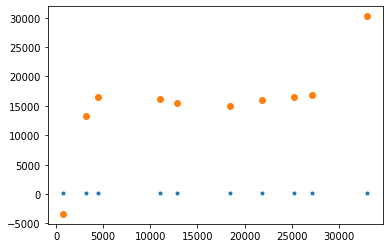

In [35]:
plt.plot(test_data['difference'],test_data['field2'], '.',
        test_data['difference'], model_time_3.predict(test_data), 'o')

In [36]:
model_time_2.extract_features

<bound method TreeModelMixin.extract_features of Class                          : BoostedTreesRegression

Schema
------
Number of examples             : 80
Number of feature columns      : 2
Number of unpacked features    : 2

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.0313
Training rmse                  : 5.6702
Validation rmse                : 4.6589
Training max_error             : 13.7362
Validation max_error           : 7.052
>

# Time series analysis
- Using tensorflow along with Pandas

In [37]:
import tensorflow as tf
import sklearn as skl

In [38]:
df = bbq_temps_time.to_dataframe()

## We clean the data again
- We drop the created at field since we now have time field and the running time
- We use the running time and the base time to do a short term time series analysis.
- We try to predict using the first half of the data how the second half might perform

    - Expectation:
        - Data would be faulty
        - Regression should go better with this kind of data analysis

In [39]:
df

,created_at,entry_id,field1,field2,time,difference
0,2017-05-29 04:59:53 UTC,16,248.7,104.8,2017-05-29 04:59:53+00:00,0.0
1,2017-05-29 05:07:23 UTC,17,253.9,107.0,2017-05-29 05:07:23+00:00,450.0
2,2017-05-29 05:11:53 UTC,18,253.6,117.3,2017-05-29 05:11:53+00:00,720.0
3,2017-05-29 05:19:23 UTC,19,244.8,118.1,2017-05-29 05:19:23+00:00,1170.0
4,2017-05-29 05:25:23 UTC,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0
...,...,...,...,...,...,...
95,2017-05-29 15:02:53 UTC,111,250.4,190.4,2017-05-29 15:02:53+00:00,36180.0
96,2017-05-29 15:10:23 UTC,112,247.9,190.7,2017-05-29 15:10:23+00:00,36630.0
97,2017-05-29 15:16:23 UTC,113,245.3,192.0,2017-05-29 15:16:23+00:00,36990.0
98,2017-05-29 15:20:53 UTC,114,251.3,192.9,2017-05-29 15:20:53+00:00,37260.0


In [40]:
df = df.drop(columns = 'created_at')

In [41]:
df

,entry_id,field1,field2,time,difference
0,16,248.7,104.8,2017-05-29 04:59:53+00:00,0.0
1,17,253.9,107.0,2017-05-29 05:07:23+00:00,450.0
2,18,253.6,117.3,2017-05-29 05:11:53+00:00,720.0
3,19,244.8,118.1,2017-05-29 05:19:23+00:00,1170.0
4,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0
...,...,...,...,...,...
95,111,250.4,190.4,2017-05-29 15:02:53+00:00,36180.0
96,112,247.9,190.7,2017-05-29 15:10:23+00:00,36630.0
97,113,245.3,192.0,2017-05-29 15:16:23+00:00,36990.0
98,114,251.3,192.9,2017-05-29 15:20:53+00:00,37260.0


# Split the data
We'll use a ```(70%, 20%, 10%)``` split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons.

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [42]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

# Normalize the data
It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So in the interest of simplicity this tutorial uses a simple average.

In [43]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

## Data windowing

The models in this project will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

* The width (number of time steps) of the input and label windows
* The time offset between them.
* Which features are used as inputs, labels, or both. 

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

* *Single-output*, and *multi-output* predictions.
* *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.


In [44]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

1. For example, to make a single prediction 24h into the future, given 24h of history you might define a window like this:

  ![One prediction 24h into the future.](images/raw_window_24h.png)

2. A model that makes a prediction 1h into the future, given 6h of history would need a window like this:

  ![One prediction 1h into the future.](images/raw_window_1h.png)

In [45]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['field2'])
w1


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['field2']

In [46]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['field2'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['field2']

### We need to define a window of 1 hour
#### We check how many inputs we have

<AxesSubplot:>

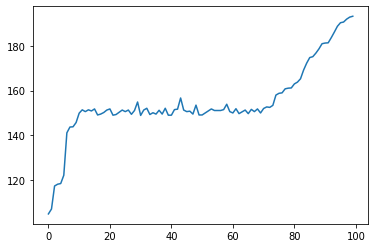

In [47]:
df['field2'].plot()

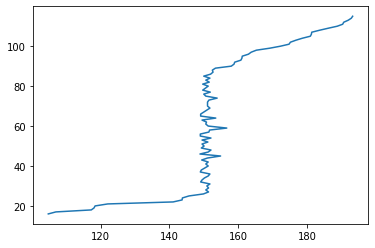

In [48]:
plt.plot(df['field2'],df['entry_id'])

In [49]:
temp = df[df['entry_id']>20]
temp = temp[temp['entry_id']<80]

Text(16290.0, 271.3, 'local max')

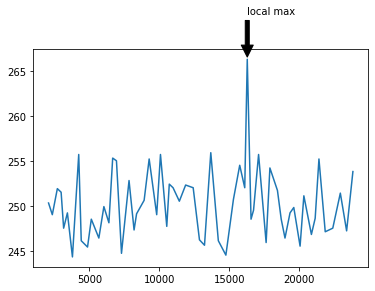

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp[temp['field1']==max(temp['field1'])]
line, = ax.plot(temp['difference'], temp['field1'])
ax.annotate('local max', xy=(16290.0, 266.3), xytext=(16290.0, 266.3+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

## We find the kink at time difference 16290

In [51]:
df_train = df[df['difference']<16290]

In [52]:
df_test = df[df['field1']>16290]

In [53]:
df_train.head()

,entry_id,field1,field2,time,difference
0,16,248.7,104.8,2017-05-29 04:59:53+00:00,0.0
1,17,253.9,107.0,2017-05-29 05:07:23+00:00,450.0
2,18,253.6,117.3,2017-05-29 05:11:53+00:00,720.0
3,19,244.8,118.1,2017-05-29 05:19:23+00:00,1170.0
4,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0


# Non-seasonal ARIMA models

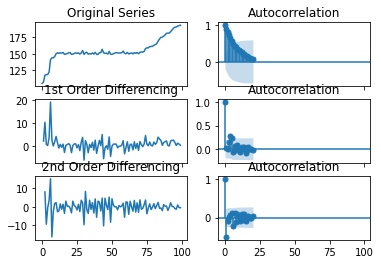

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.field2); axes[0, 0].set_title('Original Series')
plot_acf(df.field2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.field2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.field2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.field2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.field2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [55]:
from pmdarima.arima.utils import ndiffs
y = df.field2

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

1

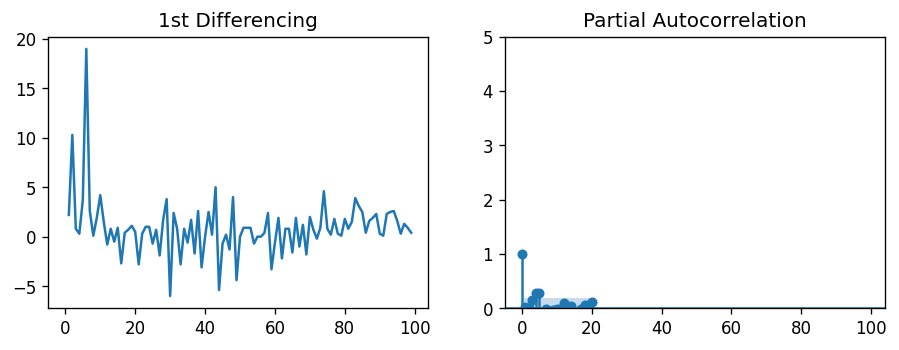

In [56]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.field2.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.field2.diff().dropna(), ax=axes[1])

plt.show()

In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model = ARIMA(df.field1, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/Users/SaharshShukla/My Documents/Core/IOT-Review-3/IOT_Temperatur_ESP8266/IOT/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/SaharshShukla/My Documents/Core/IOT-Review-3/IOT_Temperatur_ESP8266/IOT/lib/python3.8/site-

                             ARIMA Model Results                              
Dep. Variable:               D.field1   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -272.473
Method:                       css-mle   S.D. of innovations              3.707
Date:                Sat, 05 Jun 2021   AIC                            554.946
Time:                        09:36:11   BIC                            567.922
Sample:                             1   HQIC                           560.196
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.013     -0.075      0.940      -0.026       0.024
ar.L1.D.field1    -0.6609      1.466     -0.451      0.652      -3.535       2.213
ma.L1.D.field1    -0.3320      1.452

In [59]:
model = ARIMA(df.field1, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.field1   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -272.477
Method:                       css-mle   S.D. of innovations              3.707
Date:                Sat, 05 Jun 2021   AIC                            552.954
Time:                        09:36:13   BIC                            563.335
Sample:                             1   HQIC                           557.154
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.013     -0.077      0.939      -0.026       0.024
ar.L1.D.field1    -0.0030      0.101     -0.029      0.977      -0.201       0.195
ma.L1.D.field1    -0.9999      0.031

/Users/SaharshShukla/My Documents/Core/IOT-Review-3/IOT_Temperatur_ESP8266/IOT/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/SaharshShukla/My Documents/Core/IOT-Review-3/IOT_Temperatur_ESP8266/IOT/lib/python3.8/site-

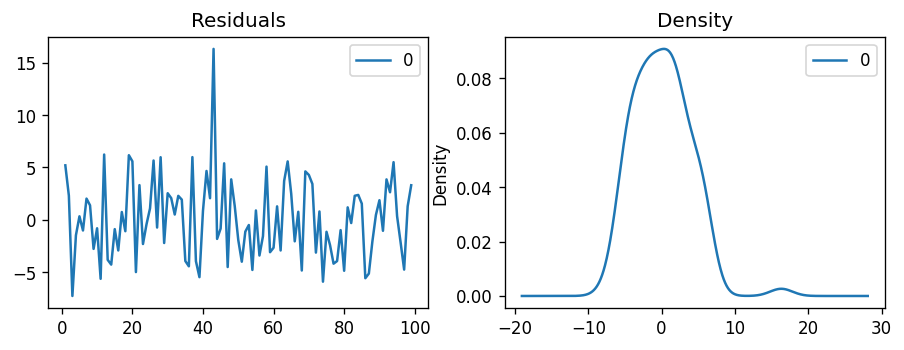

In [60]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

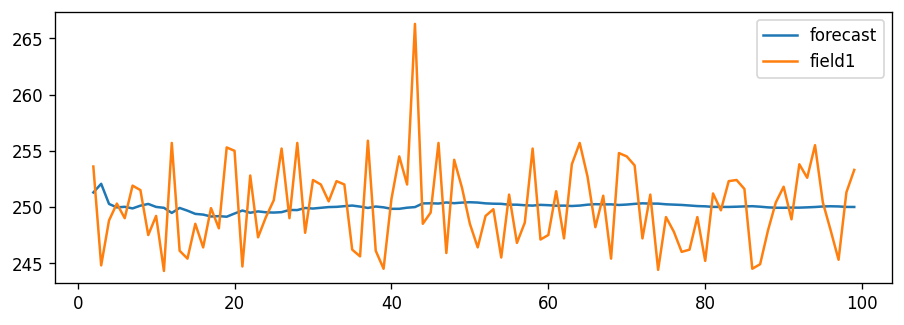

In [61]:
model_fit.plot_predict(dynamic=False)
plt.show()

## General Correlation and heatmaps

In [62]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
def getHeatMap(df):
    columns = df.columns
    corr = df[columns].corr()
    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        x=corr['x'],
        y=corr['y'],
        size=corr['value'].abs()
    )

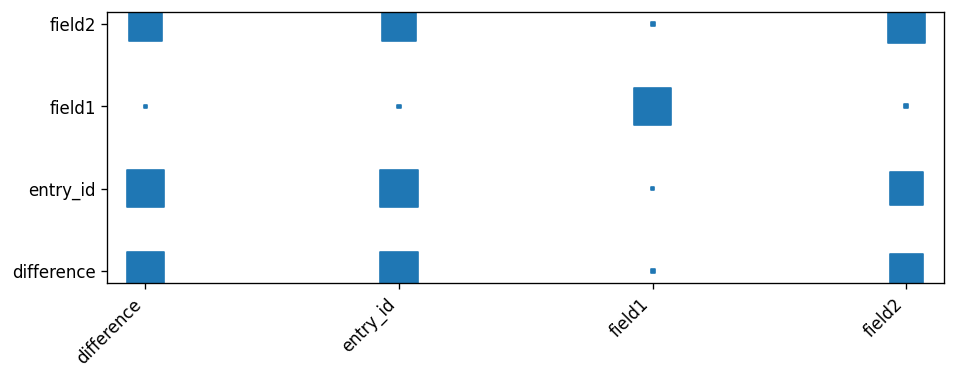

In [63]:
getHeatMap(df)

In [67]:
def getCorrelationPlot(data2):
    data = data2.drop(columns = ['entry_id'])
    fig, ax = plt.subplots(figsize=(15,15))
    corr = data.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

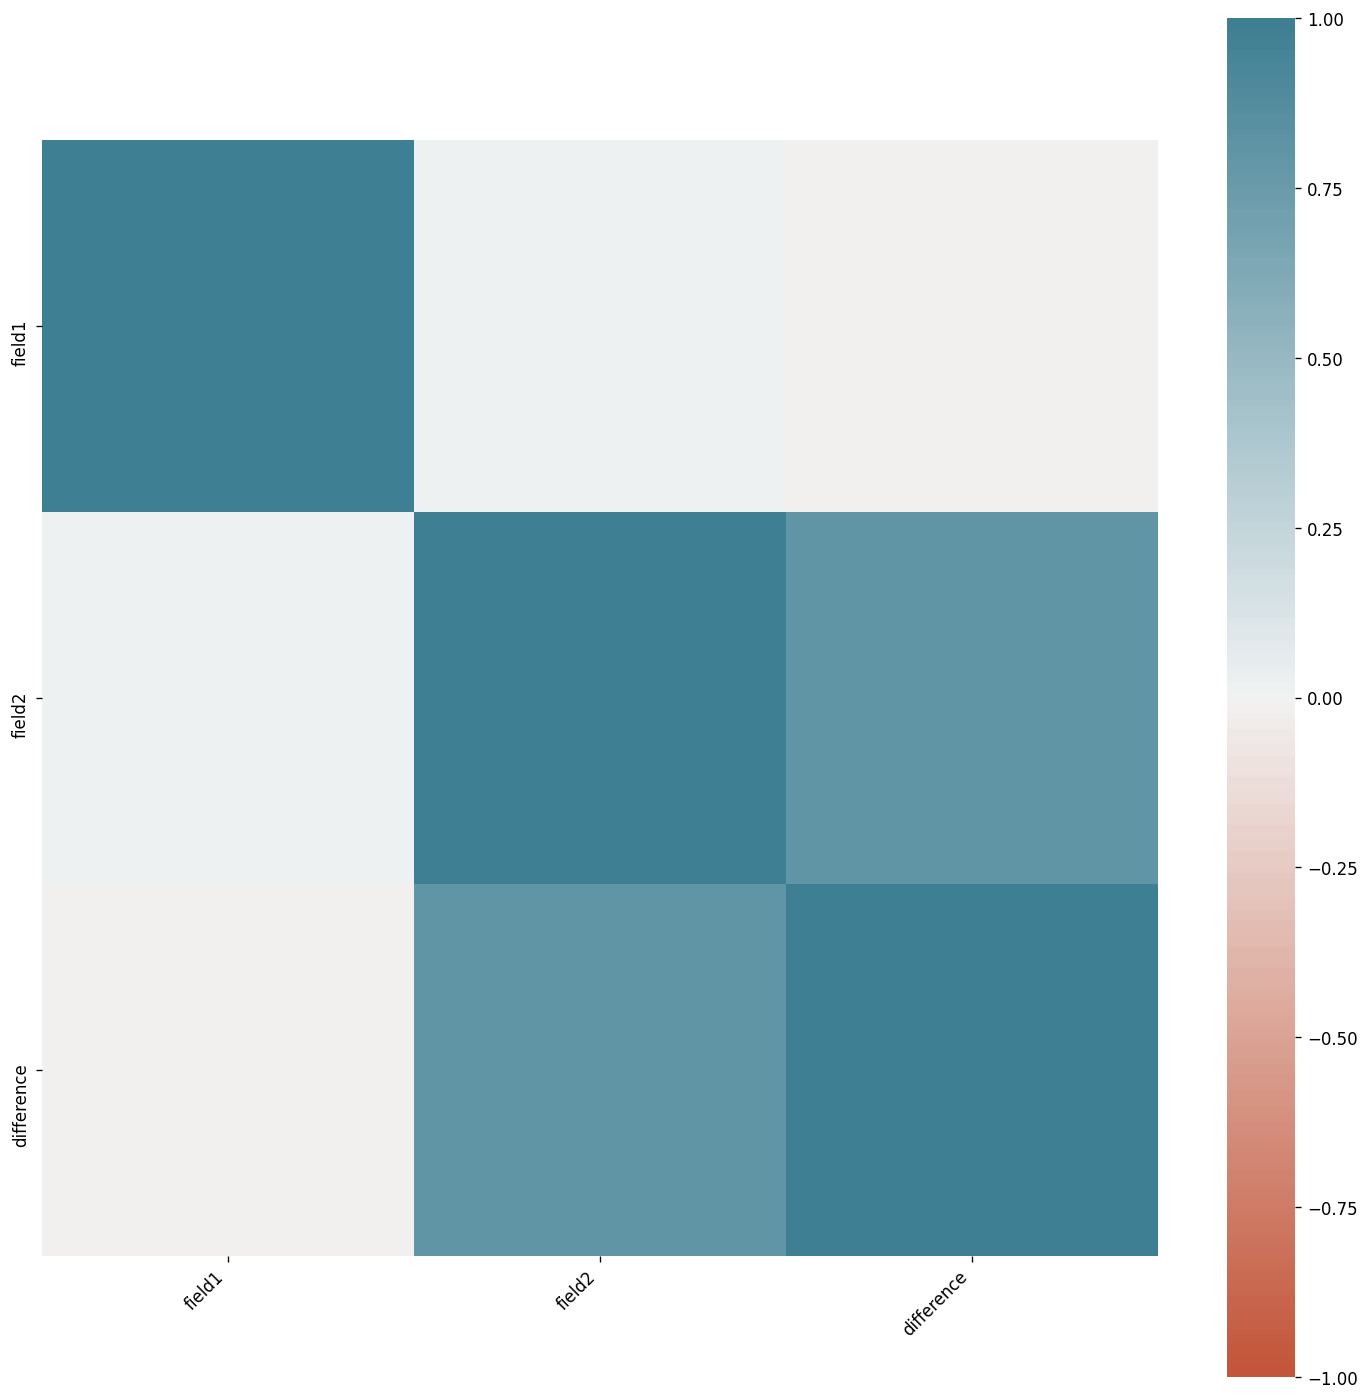

In [68]:
import seaborn as sns
getCorrelationPlot(df)

In [69]:
!pip install sklearn

## Kmeans and centroid plots

In [75]:
from sklearn.cluster import KMeans
import numpy as np
# k means
def get_Kmeans(df, col1, col2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[col1, col2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
    # define and map colors
    colors = ['#DF2020', '#81DF20', '#2095DF']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    plt.scatter(df[col1], df[col2], c=df.c, alpha = 0.6, s=10)
    return df

In [76]:
from matplotlib.lines import Line2D
def get_Centroid_plot(df, col1, col2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[col1, col2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
    # define and map colors
    colors = ['#DF2020', '#81DF20', '#2095DF']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    fig, ax = plt.subplots(1, figsize=(8,8))
    # plot data
    plt.scatter(df[col1], df[col2], c=df.c, alpha = 0.6, s=10)
    # plot centroids
    plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    # plot Attack mean
    plt.plot([df[col1].mean()]*2, color='black', lw=0.5, linestyle='--')
    # plot Defense mean
    plt.plot([df[col2].mean()]*2, color='black', lw=0.5, linestyle='--')
    # create a list of legend elemntes
    ## average line
    legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
    ## markers / records
    cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
    # add all elements to the same list
    legend_elements.extend(cluster_leg)
    legend_elements.extend(cent_leg)
    # plot legend
    plt.legend(handles=legend_elements, loc='upper right', ncol=2)
    # title and labels
    plt.title('Stats\n', loc='left', fontsize=22)
    plt.xlabel(col1)
    plt.ylabel(col2)

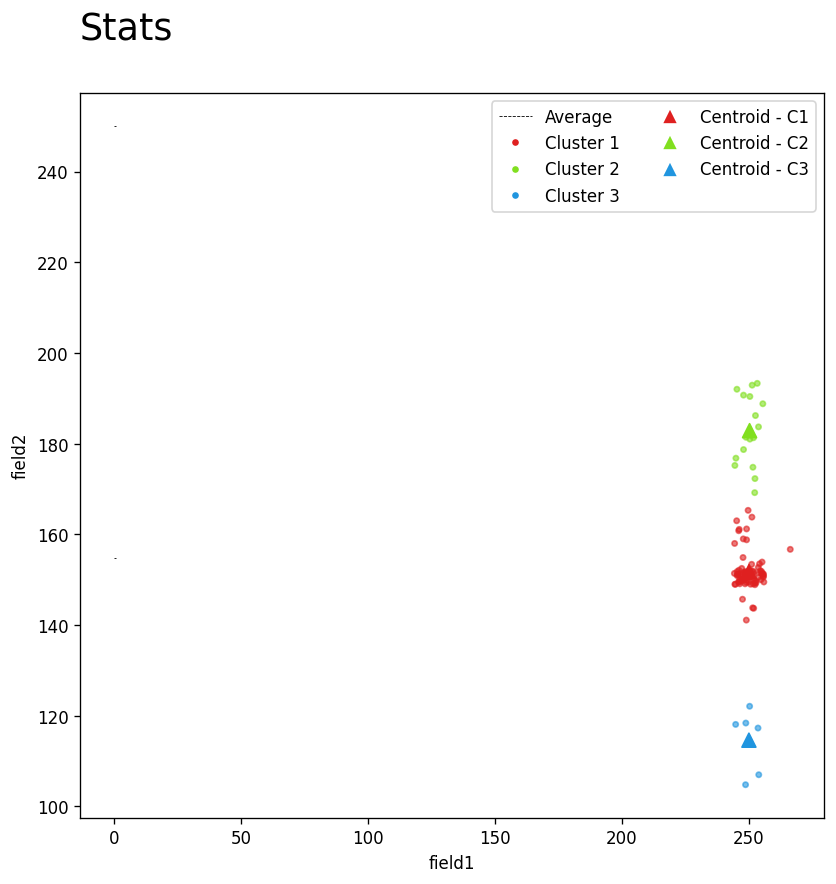

In [77]:
get_Centroid_plot(df,'field1','field2')

# Conclusion
- We find that we cannot use a forecast model (ARIMA at least) Because the results do not care for the change in external values
- Clustering can be used to find the tempperatures. We see that the Red clusters when they reach the red mark can actually help in the process of cooking

In [78]:
df2 = bbq_temps_time.to_dataframe()

In [81]:
df2
df2 = df2.drop(columns = 'created_at')

KeyError: "['created_at'] not found in axis"

In [82]:
df2

,entry_id,field1,field2,time,difference
0,16,248.7,104.8,2017-05-29 04:59:53+00:00,0.0
1,17,253.9,107.0,2017-05-29 05:07:23+00:00,450.0
2,18,253.6,117.3,2017-05-29 05:11:53+00:00,720.0
3,19,244.8,118.1,2017-05-29 05:19:23+00:00,1170.0
4,20,248.8,118.4,2017-05-29 05:25:23+00:00,1530.0
...,...,...,...,...,...
95,111,250.4,190.4,2017-05-29 15:02:53+00:00,36180.0
96,112,247.9,190.7,2017-05-29 15:10:23+00:00,36630.0
97,113,245.3,192.0,2017-05-29 15:16:23+00:00,36990.0
98,114,251.3,192.9,2017-05-29 15:20:53+00:00,37260.0


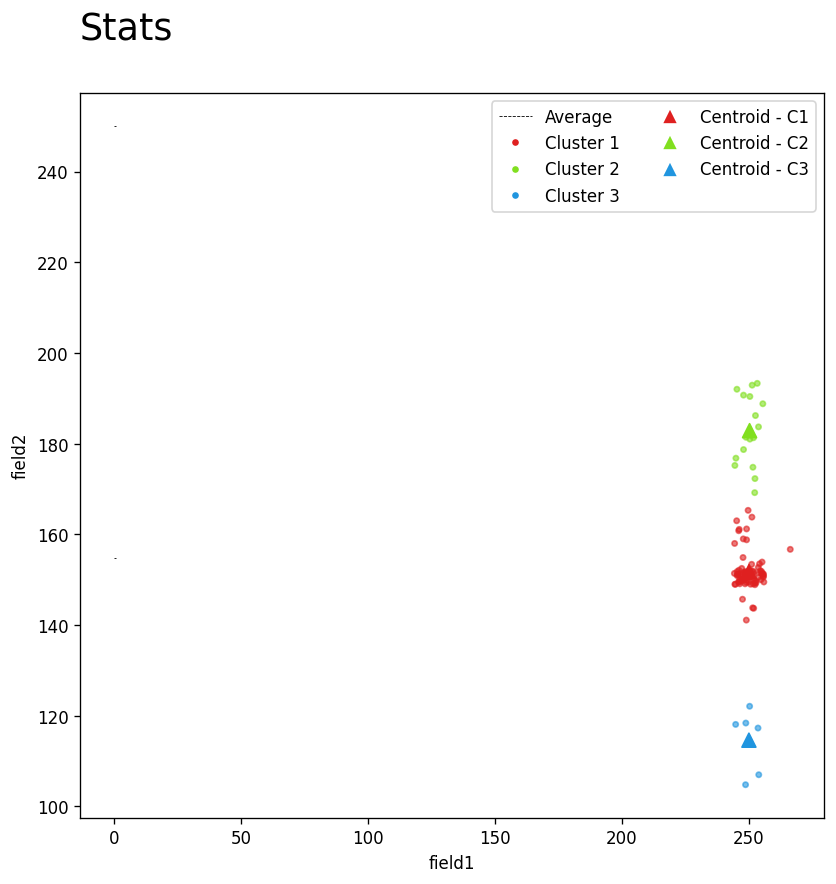

In [83]:
get_Centroid_plot(df2,'field1','field2')

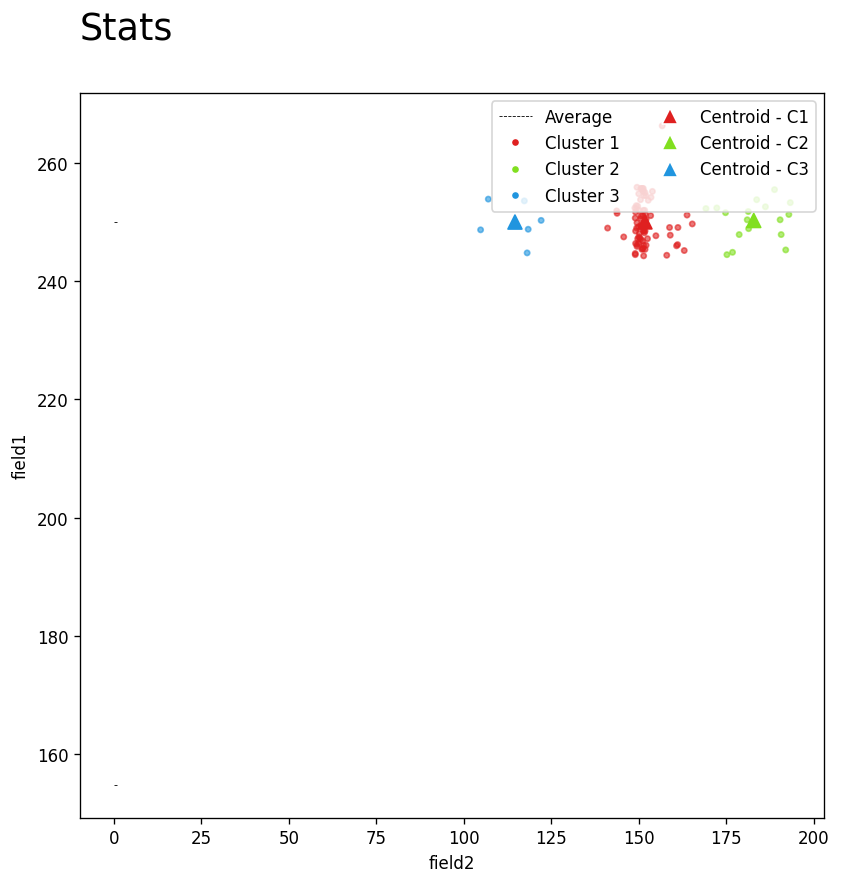

In [84]:
get_Centroid_plot(df2, 'field2', 'field1')

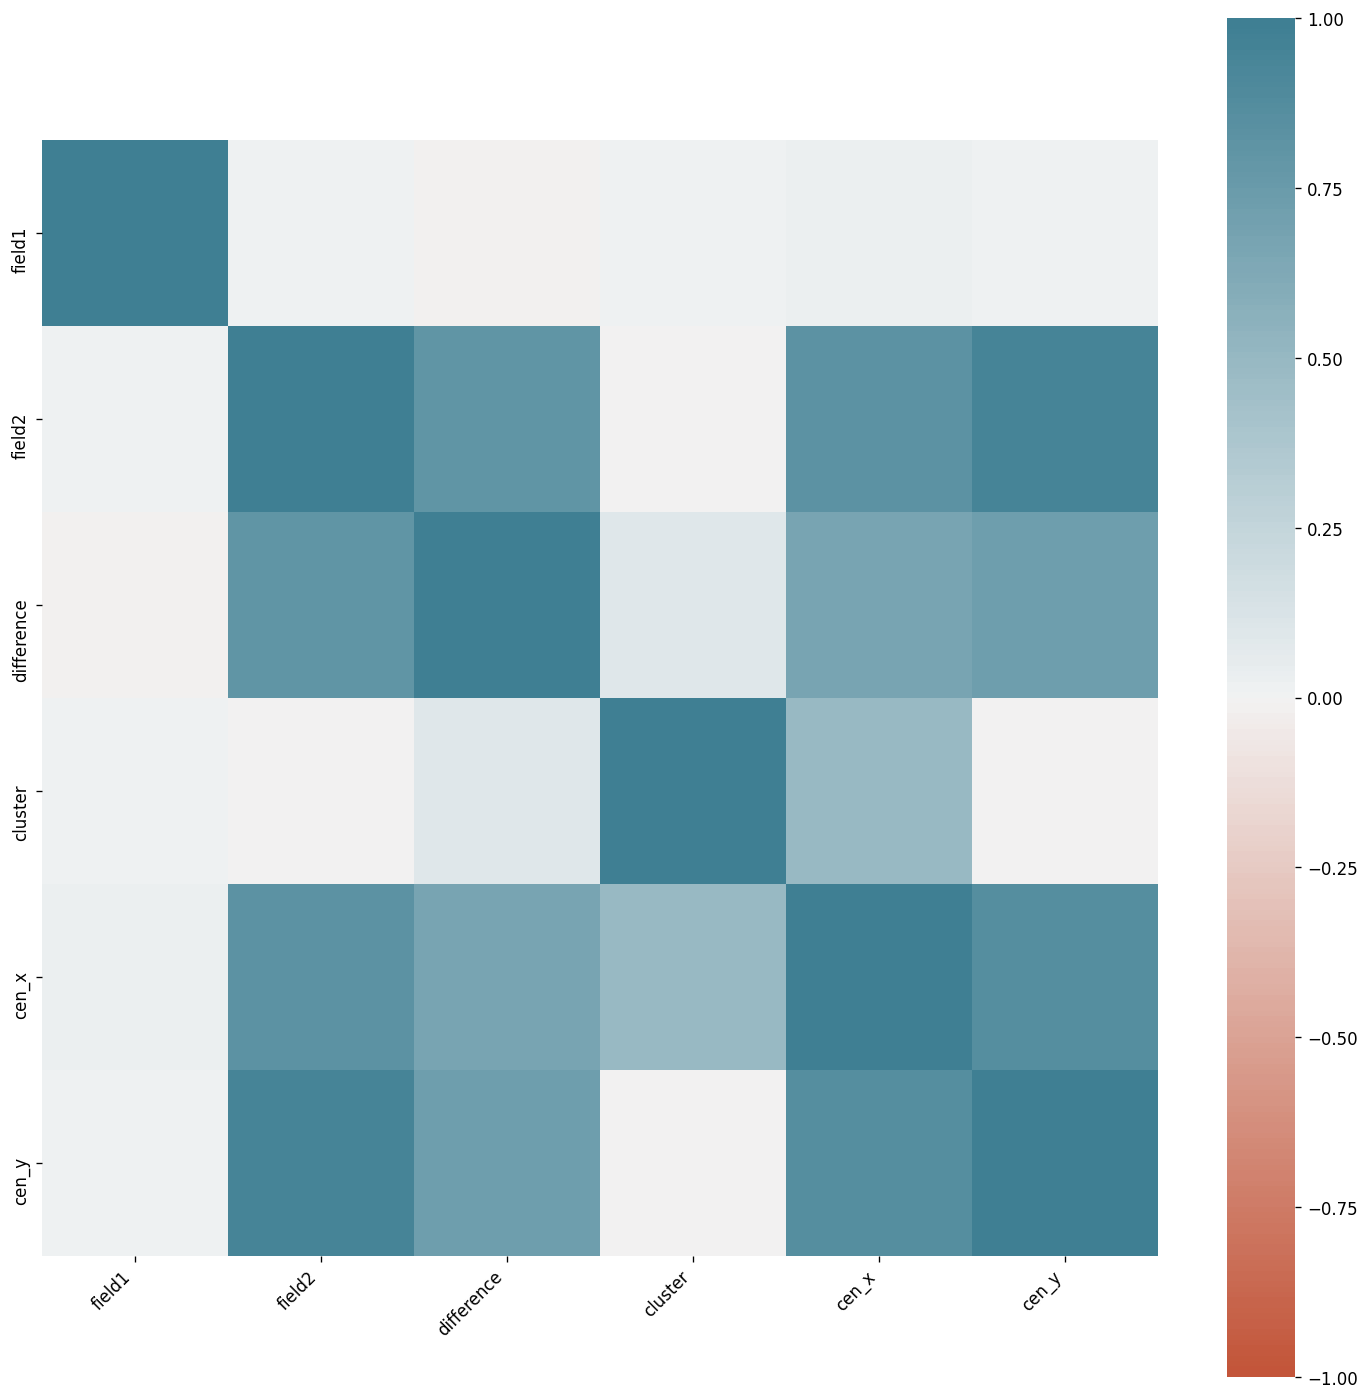

In [86]:
df2.drop(columns=['cluster', 'cen_x', 'cen_y'])
getCorrelationPlot